# Анализ структуры документа (паспорта)

In [1]:
import layoutparser as lp 

import matplotlib.pyplot as plt
%matplotlib inline 

import pandas as pd
import numpy as np
import cv2

In [2]:
import torch
torch.__version__

'1.8.0+cu111'

In [3]:
import detectron2
detectron2.__version__

'0.6'

In [4]:
!python3 -m detectron2.utils.collect_env

---------------------  ----------------------------------------------------------------------
sys.platform           linux
Python                 3.8.10 (default, Jun 22 2022, 20:18:18) [GCC 9.4.0]
numpy                  1.23.3
detectron2             0.6 @/home/mike/.local/lib/python3.8/site-packages/detectron2
Compiler               GCC 7.3
CUDA compiler          not available
DETECTRON2_ENV_MODULE  <not set>
PyTorch                1.8.0+cu111 @/home/mike/.local/lib/python3.8/site-packages/torch
PyTorch debug build    False
GPU available          No: torch.cuda.is_available() == False
Pillow                 9.2.0
torchvision            0.9.0+cu111 @/home/mike/.local/lib/python3.8/site-packages/torchvision
fvcore                 0.1.5.post20221122
iopath                 0.1.9
cv2                    4.6.0
---------------------  ----------------------------------------------------------------------
PyTorch built with:
  - GCC 7.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library V

## Загрузка исходного изображения и анализ макета стандартной моделью

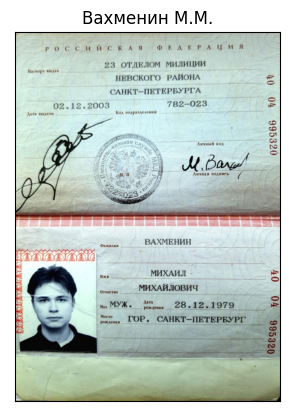

In [5]:
IMG_PATH = 'img/'
img_name = 'passportv'

img = cv2.imread(IMG_PATH + img_name + '.jpg') # чтение изображения
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # конвертация из BGR в RGB
plt.imshow(img)
plt.xticks([]) # удаляем горизонтальную шкалу
plt.yticks([]) # удаляем вертикальную шкалу
plt.title('Вахменин М.М.')
None

config.yml?dl=1: 8.19kB [00:01, 5.53kB/s]
model_final.pth?dl=1: 351MB [00:38, 9.14MB/s]                               


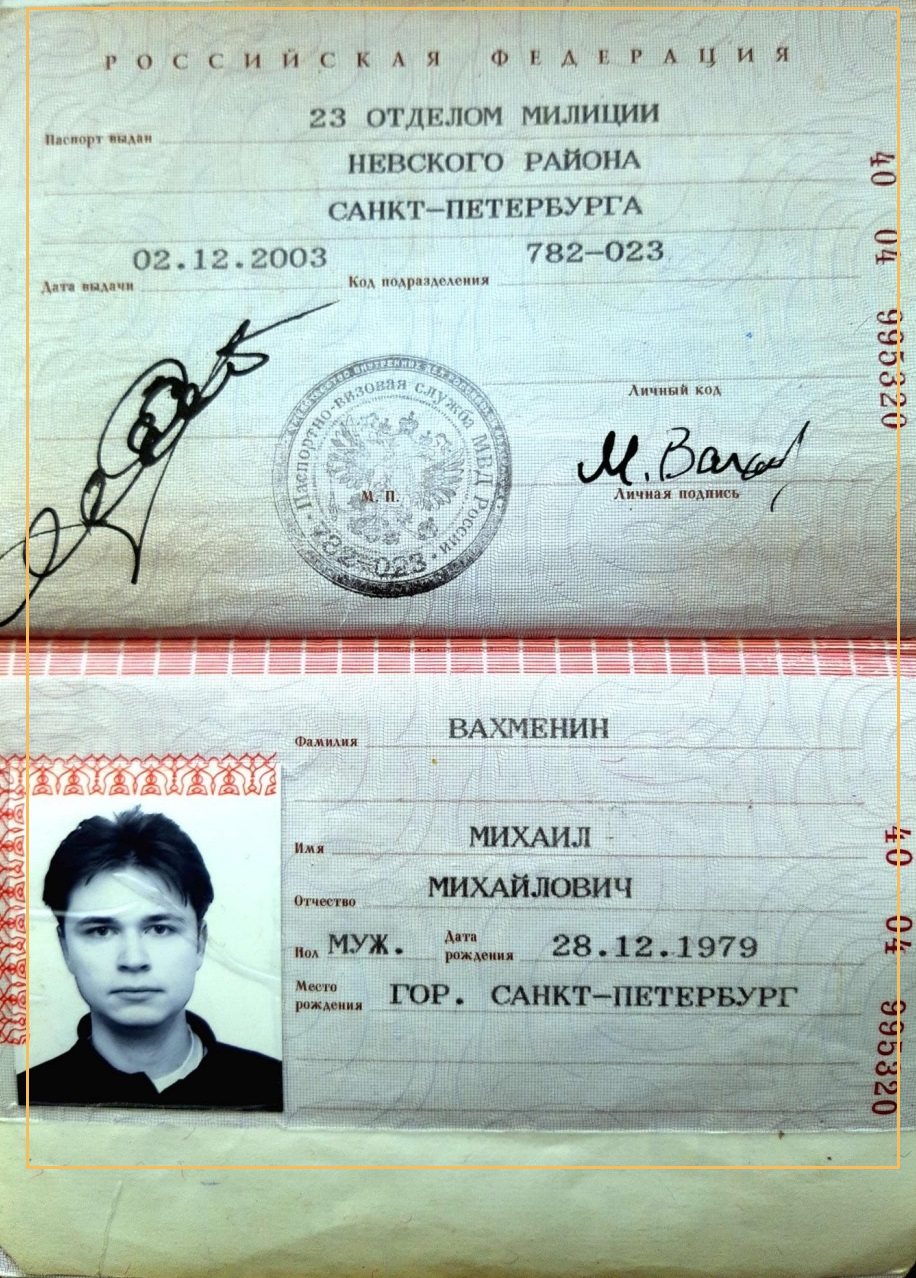

In [12]:
model = lp.models.Detectron2LayoutModel(
            config_path ='lp://PubLayNet/mask_rcnn_R_50_FPN_3x/config', # In model catalog
            label_map   ={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"}, # In model`label_map`
            extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.8] # Optional
        )
    
# Detect the layout of the input image
layout = model.detect(img)
   
# Show the detected layout of the input image
lp.draw_box(img, layout, box_width=3)

## Fine-tuning модели

Описание fine-tuning: https://towardsdatascience.com/auto-parse-and-understand-any-document-5d72e81b0be9

https://github.com/Layout-Parser/layout-model-training

https://github.com/Layout-Parser/layout-parser/blob/main/examples/Customizing%20Layout%20Models%20with%20Label%20Studio%20Annotation/Customizing%20Layout%20Models%20with%20Label%20Studio%20Annotation.ipynb

мой ноутбук в Colab: https://colab.research.google.com/drive/1Q36xTq4_HUpR06bsuYTKTAnX9uX2KxgP?hl=ru

Веса обученных моделей можно скачать здесь: https://layout-parser.readthedocs.io/en/latest/api_doc/models.html